<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\xin22\AppData\Local\Temp\ipykernel_50036\559871369.py:5: SyntaxWarning: invalid escape sequence '\D'
  with open('./../h5_data\Denmark_Kazakhstan_2023-10-14\wyscout\json_files/5414263.json', 'r') as f:


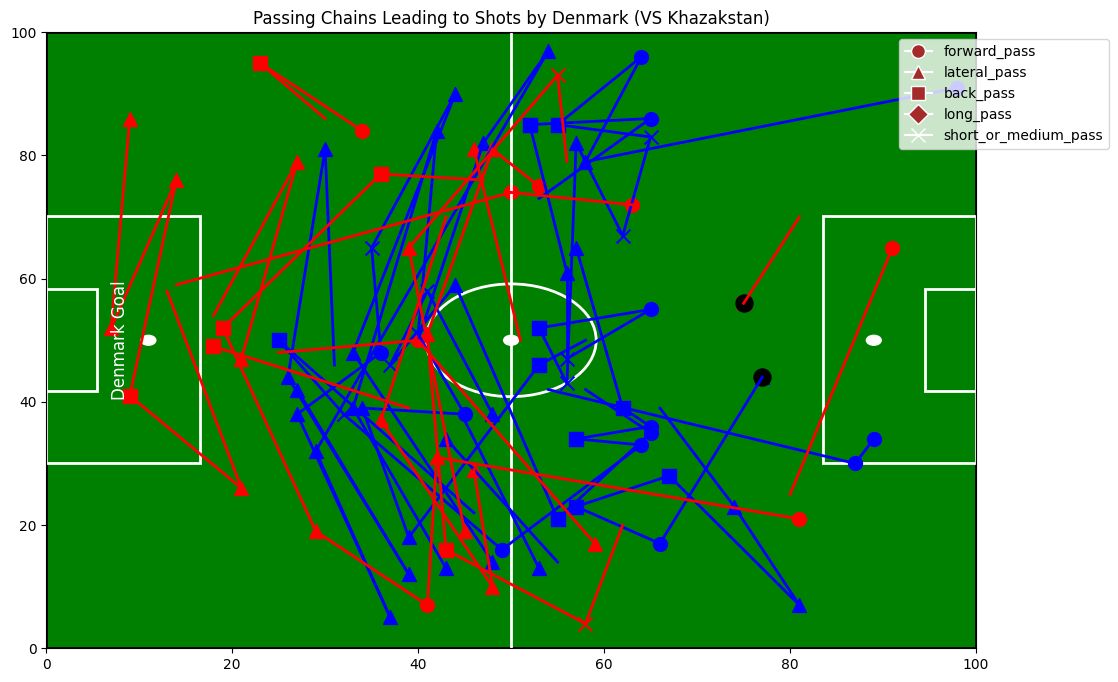

In [4]:


import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

with open('./../h5_data\Denmark_Kazakhstan_2023-10-14\wyscout\json_files/5414263.json', 'r') as f:
    data = json.load(f)

fig, ax = plt.subplots(figsize=(12, 8))

# field
def draw_pitch(ax):
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)

    ax.add_patch(patches.Rectangle((0, 0), 100, 100, edgecolor='black', facecolor='green', lw=2))

    ax.plot([50, 50], [0, 100], color='white', lw=2)
    center_circle = plt.Circle((50, 50), 9.15, color='white', fill=False, lw=2)
    ax.add_patch(center_circle)
    center_spot = plt.Circle((50, 50), 0.8, color='white', fill=True)
    ax.add_patch(center_spot)

    x=0
    penalty_area = patches.Rectangle((x, 30.1), 16.5, 40, edgecolor='white', facecolor='none', lw=2)
    goal_area = patches.Rectangle((x, 41.8), 5.5, 16.5, edgecolor='white', facecolor='none', lw=2)
    ax.add_patch(penalty_area)
    ax.add_patch(goal_area)
    x=83.5
    penalty_area = patches.Rectangle((x, 30.1), 16.5, 40, edgecolor='white', facecolor='none', lw=2)
    goal_area = patches.Rectangle((94.5, 41.8), 5.5, 16.5, edgecolor='white', facecolor='none', lw=2)
    ax.add_patch(penalty_area)
    ax.add_patch(goal_area)

    for x in [11, 89]:
        penalty_spot = plt.Circle((x, 50), 0.8, color='white', fill=True)
        ax.add_patch(penalty_spot)

    goal_left = patches.Rectangle((-1, 45.2), 1, 9.6, edgecolor='white', facecolor='white')
    goal_right = patches.Rectangle((100, 45.2), 1, 9.6, edgecolor='white', facecolor='white')
    ax.add_patch(goal_left)
    ax.add_patch(goal_right)

    ax.text(8, 50, 'Denmark Goal', color='white', fontsize=12, ha='center', va='center', rotation=90)

draw_pitch(ax)


denmark_events = [event for event in data['events'] if event['team']['name'] == 'Denmark' and (event['minute'] > 30 or (event['minute'] == 30 and event['second'] > 0))]


chains = []
current_chain = []

for event in denmark_events:
    if event['type']['primary'] == 'pass':
        current_chain.append(event)
    elif event['type']['primary'] == 'shot':
        if event['shot'] and not event['shot']['isGoal']:
            current_chain.append(event)
            if len(current_chain) > 3:
                chains.append(current_chain)
        current_chain = []


chains = chains[2:4]


colors = ['blue', 'red', 'purple', 'orange', 'brown']
styles = {
    'forward_pass': 'o',
    'lateral_pass': '^',
    'back_pass': 's',
    'long_pass': 'D',
    'short_or_medium_pass': 'x',
}

#
for i, chain in enumerate(chains):
    color = colors[i % len(colors)]
    for event in chain:
        if event['type']['primary'] == 'pass':
            start_x = event['location']['x']
            start_y = event['location']['y']
            end_x = event['pass']['endLocation']['x']
            end_y = event['pass']['endLocation']['y']
            ax.plot([start_x, end_x], [start_y, end_y], color=color, lw=2)
            pass_type = event['type']['secondary'][0]  
            style = styles.get(pass_type, 'o')
            ax.scatter(end_x, end_y, c=color, marker=style, s=100)
        elif event['type']['primary'] == 'shot':
            start_x = event['location']['x']
            start_y = event['location']['y']
            ax.scatter(start_x, start_y, c='black', s=150, label='Shot')

# 
legend_elements = [plt.Line2D([0], [0], marker=styles[key], color='w', markerfacecolor='brown', markersize=10, label=key) for key in styles.keys()]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.15, 1))

plt.title('Passing Chains Leading to Shots by Denmark (VS Khazakstan)')
plt.show()


